<a href="https://colab.research.google.com/github/aletbm/Hazardous_Asteroids_Predictions--CoderHouse/blob/main/Visualizacion__RiosAlexanderDaniel_CoderHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('dark_background')
pd.set_option('display.max_columns', 100)

In [ ]:
from IPython.display import Javascript
def adjust_display():
  display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 50000})'''))

# ☄️ NASA JPL Asteroid Dataset

<img src="https://media.ambito.com/p/da6a05c9b05cb3047a4a7f5451d7a098/adjuntos/239/imagenes/040/635/0040635192/asteroidesjpg.jpg">

## 📣 Acerca del dataset

Este dataset fue elaborado por el Investigador en Astronomia y Astrofisica Mir Sakhawat Hossain, este dataset es mantenido oficialmente por el Laboratorio de Propulsion a Chorro (JPL por sus siglas en ingles) del Instituto Tecnologico de California la cual es una organizacion que se encuentra bajo la supervision de la NASA. Este dataset contiene varios tipos de datos relacionados con asteroides.

Este dataset puede ser utilizado en proyectos de Machine Learning para tareas tanto de clasificacion como de regresion.

### Definicion de columnas:

+ **id**: ID interno
+ **spkid**: ID principal
+ **fullname**: Designacion/Nombre completo del objeto
+ **pdes**: Designación primaria de objeto
+ **name**: Nombre del objeto en la Union astronomica Internacional
+ **prefix**: Prefijo del cometa
+ **neo**: Objeto cercano a la tierra (Near-Earth Object) (Y/N)
+ **pha**: Asteroide potencialmente peligroso (Potencial Hazardous Asteroid) (Y/N)
+ **H**: Parámetro de magnitud absoluta
+ **diameter**: Diametro del objeto (equivalente a una esfera) (km)
+ **albedo**: Albedo geométrico
+ **diameter_sigma**: Incertidumbre 1-sigma en el diámetro del objeto (km)
+ **orbit_id**: ID de solución de órbita
+ **epoch**: Época de osculación en forma de día juliano (TBD)
+ **epoch_mjd**: Época de osculación en forma de día juliana modificada (TBD)
+ **epoch_cal**: Época de osculación en forma de fecha/hora del calendario (TBD)
+ **equinox**: Equinoccio de marco de referencia
+ **e**: Excentricidad
+ **a**: Semieje mayor (au)
+ **q**: Distancia del perihelio (au)
+ **i**: Inclinación. Angulo con respecto al plano eclíptico x-y (deg)
+ **om**: Longitud del nodo ascendente (deg)
+ **w**: Argumento del perihelio (deg)
+ **ma**: Anomalía media (deg)
+ **ad**: Distancia afelio (au) (tambien llamado Q)
+ **n**: Noción media (deg/d)
+ **tp**: Tiempo de paso del perihelio (TBD)
+ **tp_cal**: Tiempo de paso del perihelio en forma de fecha/hora del calendario (TBD)
+ **per**: Período orbital sideral (d)
+ **per_y**: Período orbital sideral (years)
+ **moid**: Distancia de intersección de la órbita mínima de la Tierra (au)
+ **moid_ld**: Distancia de intersección de la órbita mínima de la Tierra (LD)
+ **sigma_e**: Excentricidad (incertidumbre 1-sigma)
+ **sigma_a**: Semieje mayor (incertidumbre 1-sigma) (au)
+ **sigma_q**: Distancia del perihelio (incertidumbre 1-sigma) (au)
+ **sigma_i**: Inclinación. Angulo con respecto al plano eclíptico x-y (incertidumbre 1-sigma) (deg)
+ **sigma_om**: Longitud del nodo ascendente (incertidumbre 1-sigma) (deg)
+ **sigma_w**: Argumento del perihelio (incertidumbre 1-sigma) (deg)
+ **sigma_ma**: Anomalía media (incertidumbre 1-sigma) (deg)
+ **sigma_ad**: Distancia afelio (incertidumbre 1-sigma) (au)
+ **sigma_n**: Noción media (incertidumbre 1-sigma) (deg/d)
+ **sigma_tp**: Tiempo de paso del perihelio (incertidumbre 1-sigma) (TBD)
+ **sigma_per**: Período orbital sideral (incertidumbre 1-sigma) (d)
+ **class**: Clasificación de órbita
+ **rms**: RMS de ajuste de órbita normalizado (arcsec)

## 👁️ Echando un vistazo al dataset

In [ ]:
df_asteroids = pd.read_csv("/content/drive/MyDrive/Coder/Data Science/asteroid_dataset.csv", engine='c', low_memory=False, index_col="id")
df_asteroids.head()

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958524 entries, a0000001 to bT3S2678
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           958524 non-null  int64  
 1   full_name       958524 non-null  object 
 2   pdes            958524 non-null  object 
 3   name            22064 non-null   object 
 4   prefix          18 non-null      object 
 5   neo             958520 non-null  object 
 6   pha             938603 non-null  object 
 7   H               952261 non-null  float64
 8   diameter        136209 non-null  float64
 9   albedo          135103 non-null  float64
 10  diameter_sigma  136081 non-null  float64
 11  orbit_id        958524 non-null  object 
 12  epoch           958524 non-null  float64
 13  epoch_mjd       958524 non-null  int64  
 14  epoch_cal       958524 non-null  float64
 15  equinox         958524 non-null  object 
 16  e               958524 non-null  float64
 17  a     

In [ ]:
adjust_display()
df_asteroids.describe().transpose()

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
spkid,938603.0,3.798485e+06,6.867752e+06,2.000001e+06,2.234652e+06,2.469302e+06,3.732216e+06,5.401723e+07
H,932341.0,1.688997e+01,1.801386e+00,-1.100000e+00,1.600000e+01,1.690000e+01,1.770000e+01,3.320000e+01
epoch,938603.0,2.458871e+06,7.055064e+02,2.425052e+06,2.459000e+06,2.459000e+06,2.459000e+06,2.459000e+06
epoch_mjd,938603.0,5.887092e+04,7.055064e+02,2.505100e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04
epoch_cal,938603.0,2.019698e+07,1.940867e+04,1.927062e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07
e,938603.0,1.561461e-01,9.300582e-02,0.000000e+00,9.206445e-02,1.448654e-01,2.005979e-01,1.855356e+00
a,938603.0,2.906752e+00,4.013775e+01,-1.470245e+04,2.388114e+00,2.647342e+00,3.002579e+00,3.348890e+04
q,938603.0,2.397725e+00,2.159374e+00,7.051073e-02,1.971656e+00,2.226687e+00,2.579723e+00,8.039882e+01
i,938603.0,9.048065e+00,6.646721e+00,7.744220e-03,4.154593e+00,7.404507e+00,1.239818e+01,1.750829e+02
om,938603.0,1.684496e+02,1.028745e+02,2.451052e-05,8.056590e+01,1.598973e+02,2.521821e+02,3.599998e+02


# Busqueda de datos nulos

In [ ]:
cantidad = df_asteroids.isna().sum()
cantidad = cantidad[cantidad.values > 0]
porcentaje = cantidad * 100 / df_asteroids.shape[0]
df_nulls = pd.DataFrame(data={"Cantidad de valore nulos":cantidad, "Porcentaje de valores nulos":porcentaje}, index=cantidad.index).sort_values(by=["Porcentaje de valores nulos"], ascending=False)
df_nulls

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,958506,99.998122
name,936460,97.698128
albedo,823421,85.905100
diameter_sigma,822443,85.803068
diameter,822315,85.789714
sigma_per,19926,2.078821
sigma_ad,19926,2.078821
sigma_i,19922,2.078404
sigma_q,19922,2.078404
sigma_a,19922,2.078404


Nuestro `target` es `pha` y como podemos ver tiene valores nulos afortunadamente solo representan el 2.07% del total de datos. Sin valores de `target` esos registros no nos son utiles para la prediccion.
Veamos como lucen:



In [ ]:
df_asteroids[df_asteroids["pha"].isna()]

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
bJ39R00R,3246903,(1939 RR),1939 RR,NaN,NaN,N,NaN,12.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaN
bJ90O05K,3803913,(1990 OK5),1990 OK5,NaN,NaN,N,NaN,16.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.29
bJ91R28N,3884244,(1991 RN28),1991 RN28,NaN,NaN,N,NaN,19.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.22
bJ93T11C,3884246,(1993 TC11),1993 TC11,NaN,NaN,N,NaN,19.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.18
bJ94A09F,3884247,(1994 AF9),1994 AF9,NaN,NaN,N,NaN,18.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bK20K03Q,54017210,(2020 KQ3),2020 KQ3,NaN,NaN,N,NaN,19.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCA,0.30
bK20K03R,54017211,(2020 KR3),2020 KR3,NaN,NaN,N,NaN,19.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMB,0.31
bK20K03V,54017212,(2020 KV3),2020 KV3,NaN,NaN,N,NaN,19.91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMB,0.40


Aparentemente estos registros contienen muchos otras columnas con datos nulos, por lo que sera beneficioso prescindir de estos registros.

In [ ]:
df_asteroids = df_asteroids[~df_asteroids["pha"].isna()]
cantidad = df_asteroids.isna().sum()
cantidad = cantidad[cantidad.values > 0]
porcentaje = cantidad * 100 / df_asteroids.shape[0]
df_nulls = pd.DataFrame(data={"Cantidad de valore nulos":cantidad, "Porcentaje de valores nulos":porcentaje}, index=cantidad.index).sort_values(by=["Porcentaje de valores nulos"], ascending=False)
df_nulls

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,938585,99.998082
name,916539,97.649272
albedo,803500,85.605948
diameter_sigma,802522,85.501751
diameter,802394,85.488114
H,6262,0.667162
sigma_per,5,0.000533
sigma_ad,5,0.000533
neo,4,0.000426
ad,4,0.000426


Como vemos los porcentajes de valores nulos de muchos `features` se redujo considerablemente. Voy a considerar que las `features` que tiene un porcentaje de valores nulos mayor al 3% pueden ser descartados.

In [ ]:
columns_nan = df_nulls[df_nulls["Porcentaje de valores nulos"] > 3].index
df_nulls[df_nulls["Porcentaje de valores nulos"] > 3]

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,938585,99.998082
name,916539,97.649272
albedo,803500,85.605948
diameter_sigma,802522,85.501751
diameter,802394,85.488114


Estas caracteristicas seran descartadas por su abundante cantidad de valres nulos.

In [ ]:
df_asteroids.drop(columns_nan, axis=1, inplace=True)
df_asteroids

In [ ]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938603 entries, a0000001 to bT3S2678
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   spkid      938603 non-null  int64  
 1   full_name  938603 non-null  object 
 2   pdes       938603 non-null  object 
 3   neo        938599 non-null  object 
 4   pha        938603 non-null  object 
 5   H          932341 non-null  float64
 6   orbit_id   938603 non-null  object 
 7   epoch      938603 non-null  float64
 8   epoch_mjd  938603 non-null  int64  
 9   epoch_cal  938603 non-null  float64
 10  equinox    938603 non-null  object 
 11  e          938603 non-null  float64
 12  a          938603 non-null  float64
 13  q          938603 non-null  float64
 14  i          938603 non-null  float64
 15  om         938603 non-null  float64
 16  w          938603 non-null  float64
 17  ma         938602 non-null  float64
 18  ad         938599 non-null  float64
 19  n          938603 n

Una vez descartadas las `features` con mayor cantidad de datos nulos procedamos a explorar el dataset.

# Visualizacion de datos
## Balance de datos categoricos
### Por `PHA`

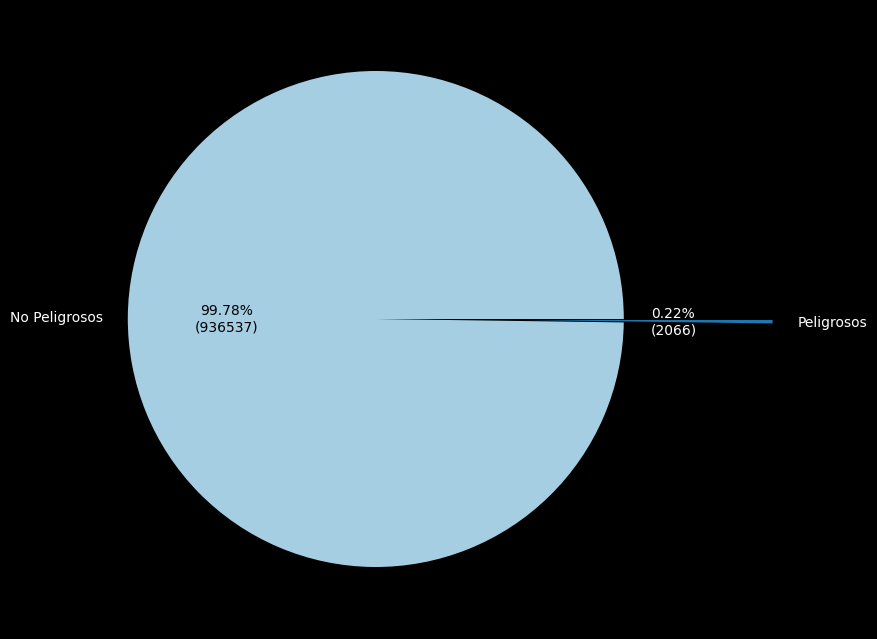

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return my_format

cmap = mpl.colormaps['Paired']
plt.figure(figsize=(8,20))
pha_counts = df_asteroids["pha"].value_counts()
_, _, autotexts = plt.pie(pha_counts, labels=["No Peligrosos", "Peligrosos"], autopct=autopct_format(pha_counts), explode=(0, 0.6), colors=[cmap(0), cmap(1)])
autotexts[0].set_color('black')

Como podemos observar nuestro dataset esta muy desbalanceado con respecto al `target`, es decir, tenemos muchos registros de asteroides no peligroso con respecto a los pocos registros de asteroides peligroso. Esto puede representar un problema y mas adelante veremos como lidiar con ello.

### Por `NEO`, `ORBIT_ID`, `EQUINOX` y `CLASS`

<IPython.core.display.Javascript object>

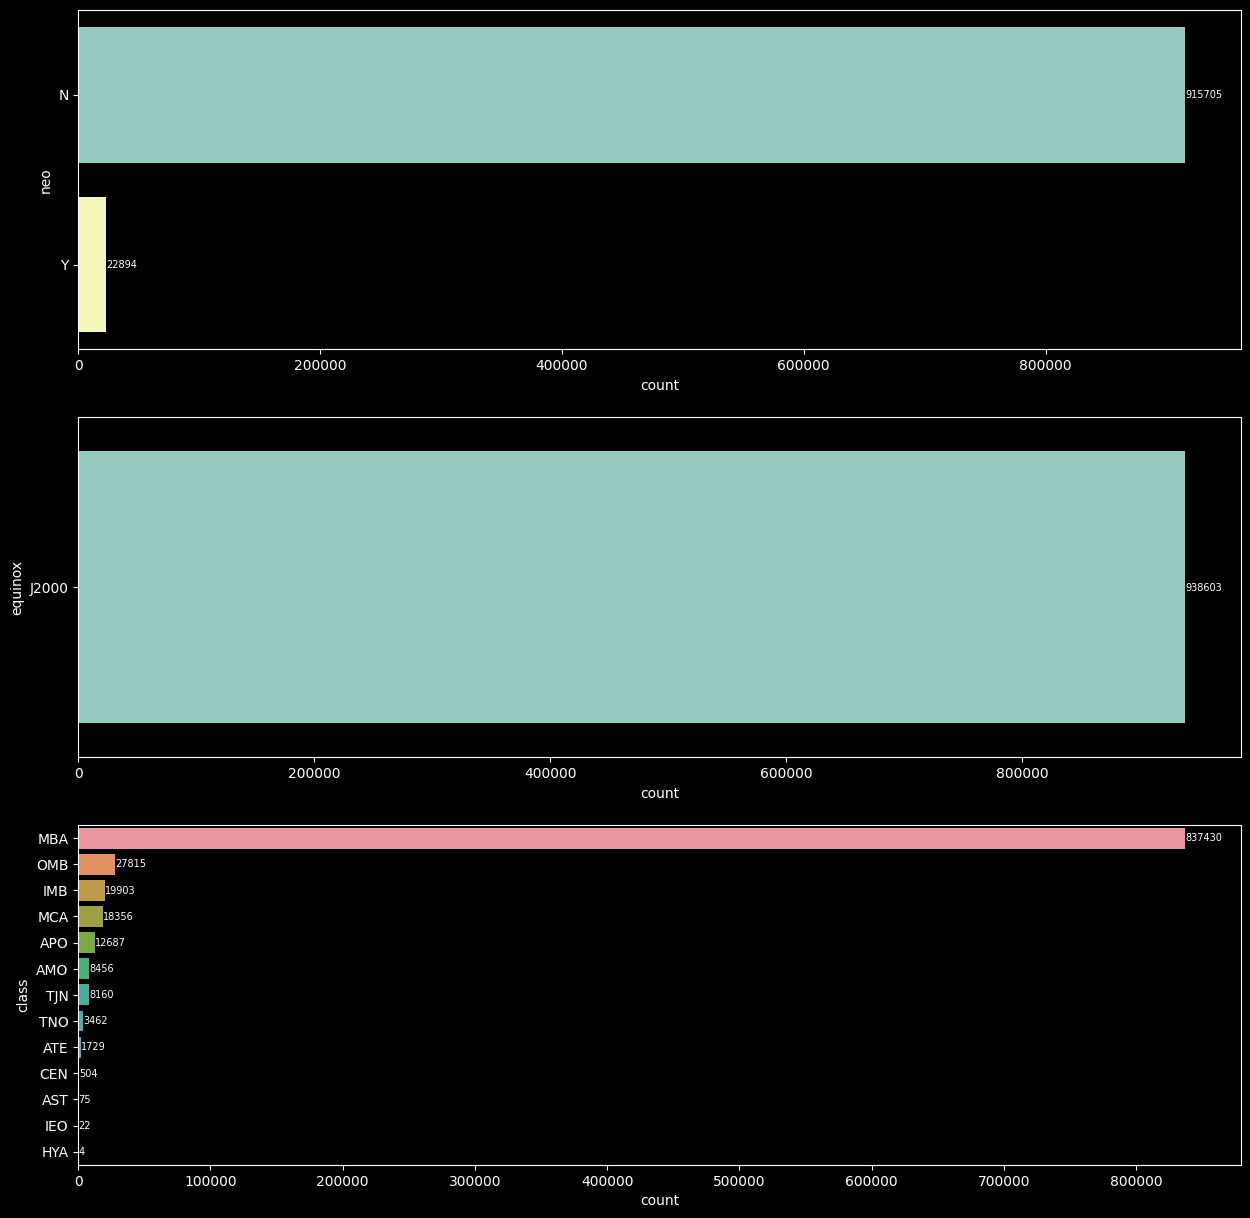

In [ ]:
adjust_display()
fig = plt.figure(figsize=(15, 15))
axs = fig.subplots(3, 1)
for i, col in enumerate(["neo", "equinox", "class"]):
  sns.countplot(data=df_asteroids, y=col, ax=axs[i], order = df_asteroids[col].value_counts().index)
  for container in axs[i].containers:
    axs[i].bar_label(container, fontsize=7)

Tenemos 3 graficos y hablaremos un poco sobre ellos:

+ `neo` es un parametros que nos define si un asteroide es o no un objeto cercano al planeta Tierra (Near-Earth Object). Como era de esperar la mayoria de asteroides no son cercanos y esto va de la mano con lo que vimos anteriormente, habiamos visto que hay un gran porcentaje de asteroides que no son peligrosos para la Tierra por lo tanto es normal que esos mismos asteroides en su mayoria esten alejados de la Tierra. Esto no implica que algun asteroide alejado de la tierra no sea potencialmente peligroso.

+ Lo primero que podemos destacar es que todos los valores de `equinox` son `J2000` por lo que si todos los valores son iguales este `feature` a simple vista no es muy util. Pero investigando un poco encontre lo siguiente en esta wiki de [Wikipedia](https://es.wikipedia.org/wiki/Fecha_juliana#J2000.0):

  >*En astronomía, **J2000.0** se refiere a la fecha juliana 2451545.0 TT (Tiempo Terrestre), o 1 de enero de 2000, mediodía TT. Es equivalente al 1 de enero de 2000, 11:59:27.816 TAI, o 1 de enero de 2000, 11:58:55.816 UTC.*
  >
  >*Esta fecha es usada ampliamente para indicar un instante en el tiempo estándar para la medición de las posiciones de los cuerpos celestes y otros acontecimientos estelares. Por ejemplo, aunque de forma imperceptible a simple vista, las estrellas se mueven en el espacio, y es necesario, para describir su posición en el firmamento, especificar la fecha a la que se refiere dicha posición. Como podemos ver la mayoria de asteroides de los cuales tenemos registros no son cercanos a la tierra.*

Si observamos nuestro dataset, por ejemplo, veremos que tenemos 3 `features` denominados `epoch`, `epoch_mjd` y `epoch_cal`, que son tiempos que estan asociados a conjuntos de elementos osculadores, junto a `equinox` nos indican que se encuentran dentro del marco de referencia **J2000**.

+ Por otro lado podemos obser que la mayoria de los asteroides se encuentra clasificados como MBA (Main-belt Asteroid) es decir que son asteroides con elementos orbitales restringidos por (2,0 AU < a < 3,2 AU; q > 1,666 AU).

<img src=https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/mainasteroidbelt1.gif>

¿Pero que son las AU? Son las Unidades Astronomicas y fueron inventadas debido a que las distancias en el Sistema Solar son muy grandes, para comparar las distancias medias entre el Sol y los planetas, conviene hacerlo en términos de la separación media entre la Tierra y el Sol.

1 AU = distancia media entre el sol y la tierra = 1,496.10^8 km

<img src=https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/AU.gif>

Investigando un poco logre dar con la siguiente tabla:

|Abreviacion|Titulo|Descripcion|
|-------------|------|-----------|
|AMO|Amor|Asteroide cercano a la Tierra orbita similar a la de 1221 Amor (a > 1.0 AU; 1.017 AU < q < 1.3 AU).
|APO|Apollo|Órbitas de asteroides cercanos a la Tierra que cruzan la órbita de la Tierra similar a la del Apolo de 1862 (a > 1.0 AU; q < 1.017 AU).
|AST|Asteroid|La órbita del asteroide no coincide con ninguna clase de órbita definida.
|ATE|Aten|Asteroide cercano a la Tierra orbita similar al de 2062 Aten (a < 1.0 AU; Q > 0.983 AU).
|CEN|Centaur|Objetos con órbitas entre Júpiter y Neptuno (5.5 AU < a < 30.1 AU).
|HYA|Hyperbolic Asteroid|Asteroides en órbitas hiperbólicas (e > 1.0).
|IEO|Interior Earth Object|Una órbita de asteroide contenida completamente dentro de la órbita de la Tierra.(Q < 0.983 AU).
|IMB|Inner Main-belt Asteroid|Asteroides con elementos orbitales restringidos por(a < 2.0 AU; q > 1.666 AU).
|MBA|Main-belt Asteroid|Asteroides con elementos orbitales restringidos por (2.0 AU < a < 3.2 AU; q > 1.666 AU).
|MCA|Mars-crossing Asteroid|Asteroides que cruzan la órbita de Marte restringidos por (1.3 AU < q < 1.666 AU; a < 3.2 AU).
|OMB|Outer Main-belt Asteroid|Asteroides con elementos orbitales restringidos por (3.2 AU < a < 4.6 AU).
|PAA|Parabolic Asteroid|Asteroides en órbitas parabólicas (e = 1.0).
|TJN|Jupiter Trojan|Asteroides atrapados en los puntos de Lagrange L4/L5 de Júpiter (4.6 AU < a < 5.5 AU; e < 0.3).
|TNO|TransNeptunian Object|Objetos con órbitas fuera de Neptuno (a > 30.1 AU).

Donde `a` es el semieje mayor de la orbita, `q` es la distancia del perihelio, `Q` o `ad` es la distancia afelio y `e` es la excentricidad de la orbita. Veamos que son estos parametros.

Una orbita por lo general es una elipse, el semieje mayor de una elipse `a` es el siguiente:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Ellipse_semi-major_and_minor_axes.svg/450px-Ellipse_semi-major_and_minor_axes.svg.png>

El afelio es el punto de una orbita que mas lejos se encuentra del sol (`Q`) y, en contra parte, existe el perihelio que es el punto de una orbita mas cercano al sol (`q`):

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Afelio_Perihelio_Sol_Tierra.png/375px-Afelio_Perihelio_Sol_Tierra.png>

Y por ultimo la excentricidad `e` es un parámetro que determina el grado de desviación de una sección cónica con respecto a una circunferencia. Por lo tanto nos define la forma eliptica que adopta la orbita del cuerpo celeste:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Excentricidad.svg/330px-Excentricidad.svg.png>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Conic_sections_ani.gif/330px-Conic_sections_ani.gif>

In [ ]:
df_asteroids

,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556


<IPython.core.display.Javascript object>

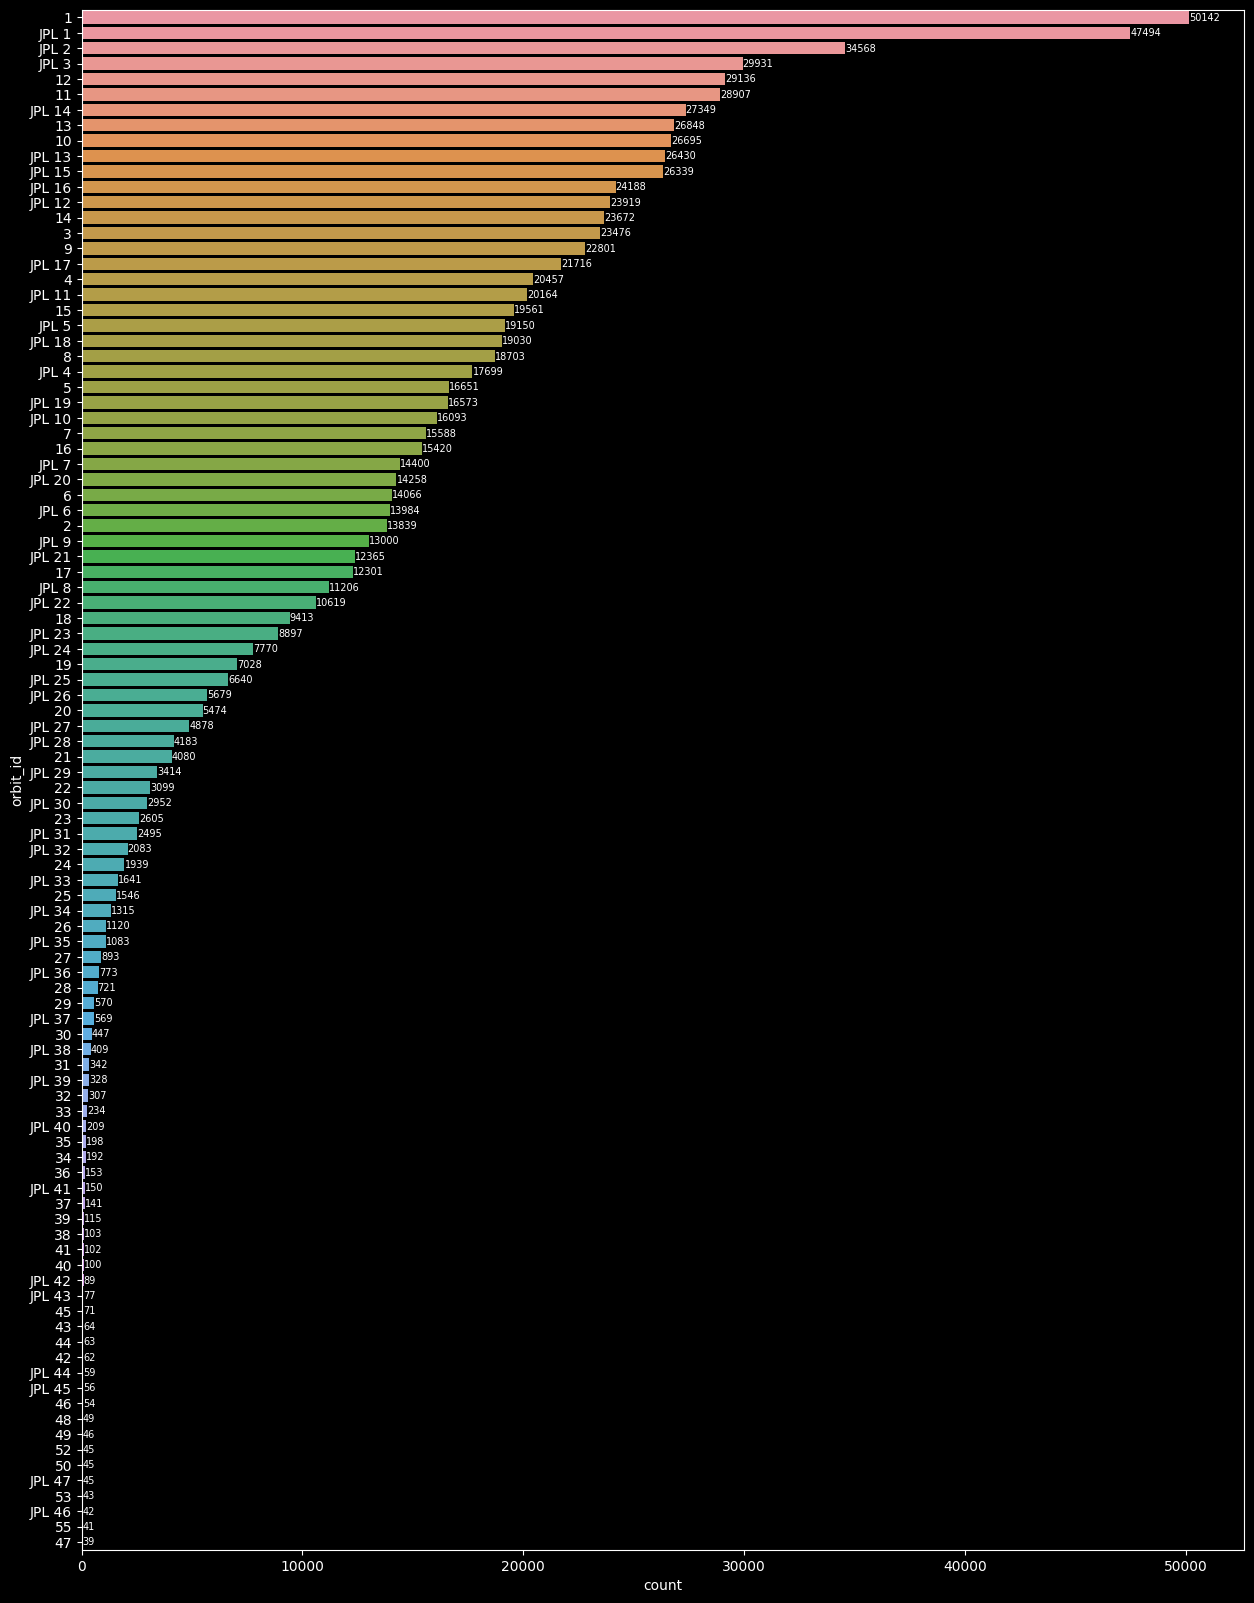

In [ ]:
adjust_display()
fig = plt.figure(figsize=(15, 20))
ax = sns.countplot(data=df_asteroids, y="orbit_id", order = df_asteroids["orbit_id"].value_counts().iloc[:100].index)
for container in ax.containers:
    ax.bar_label(container, fontsize=7)